In [459]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import find_peaks
from scipy.optimize import curve_fit,leastsq

4096


(-50, 200)

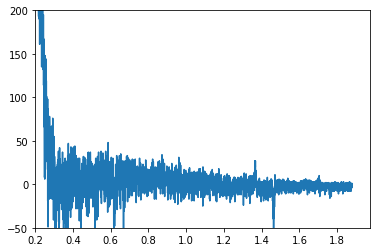

In [222]:
data = np.loadtxt("angled.csv",delimiter=",", skiprows = 1)

energy = data[:,0]
non_at = data[:,1]
carbon = data[:,2]
al = data[:,3]
cu = data[:,4]
sn = data[:,5]
tungsten = data[:,6]
pb = data[:,7]

print(len(non_at))

plt.plot(energy, carbon)
plt.xlim(0.2)
plt.ylim(-50,200)

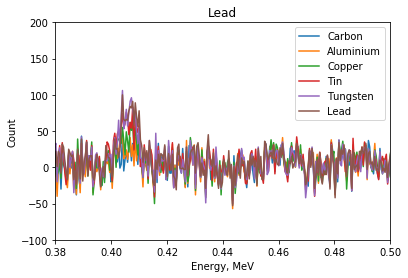

In [223]:
graphs = [non_at,carbon,al,cu,sn,tungsten,pb]
title = ["Non Attenuated","Carbon","Aluminium","Copper","Tin", "Tungsten","Lead"]

for i in range(1,7):
    plt.plot(energy,graphs[i], label = title[i])
    plt.title(title[i])
    plt.xlabel("Energy, MeV")
    plt.ylabel("Count")
    plt.xlim(0.38,0.5)
    plt.ylim(-100,200)
    
    #if i == 0:
        #plt.ylim(0,1000)
        #plt.plot(1.382,170,'x',color= "red")
        
    if i == 1:
        #plt.ylim(0,100)
        plt.plot(1.366,30, 'x', color = 'red')
        
    if i == 2:
        #plt.ylim(0,60)
        plt.plot(1.366,28, 'x', color = 'red')
        
    if i == 3:
        #plt.ylim(0,60)
        plt.plot(1.366,32, 'x', color = 'red')
    
    if i == 4:
        #plt.ylim(0,60)
        plt.plot(1.366,32, 'x', color = 'red')
        
    if i == 5:
        #plt.ylim(0,60)
        plt.plot(0.511,30, 'x', color = 'red')
    
    if i == 6:
        #plt.ylim(0,60)
        plt.plot(1.366,26, 'x', color = 'red')
    
    '''
    if i >= 1:
        plt.ylim(0,100)
        plt.axvline(1.366,color="red")
        #plt.axhline(30,color = "red")
    else:
        plt.ylim(0,200)
        plt.axvline(1.382,color="red")
        plt.axhline(165,color = "red")
    '''
    
plt.legend()
plt.show()

In [430]:
npaC = 2.2403331762721608e+27
npaAl = 1.7266547612540997e+27
npaCu = 4.543579762290887e+26
npaSn = 2.7050726653630804e+26
npaW = 1.5260534006699155e+26
npaPb = 1.2847715090722212e+26 #kg/m^2

#Nuclei/Area C = 2.2403331762721608e+24
#Nuclei/Area Al = 1.7266547612540997e+24
#Nuclei/Area Cu = 4.543579762290887e+23
#Nuclei/Area Sn = 2.7050726653630804e+23
#Nuclei/Area W = 1.5260534006699156e+23
#Nuclei/Area Pb = 1.2847715090722212e+23

In [431]:
print(energy[872:910])

print(910-872)

int_na = np.sum(non_at[872:910])/38/4#575
int_c = np.sum(np.absolute(carbon[872:910]))/38
int_al = np.sum(np.absolute(al[872:910]))/38
int_cu = np.sum(np.absolute(cu[872:910]))/38
int_sn = np.sum(np.absolute(sn[872:910]))/38
int_w = np.sum(np.absolute(tungsten[872:910]))/38
int_pb = np.sum(np.absolute(pb[872:910]))/38

print(int_na)
print(int_c)
print(int_al)
print(int_cu)
print(int_sn)
print(int_w)
print(int_pb)

[0.40034907 0.40080819 0.4012673  0.40172642 0.40218553 0.40264465
 0.40310377 0.40356288 0.404022   0.40448111 0.40494023 0.40539935
 0.40585846 0.40631758 0.40677669 0.40723581 0.40769492 0.40815404
 0.40861316 0.40907227 0.40953139 0.4099905  0.41044962 0.41090874
 0.41136785 0.41182697 0.41228608 0.4127452  0.41320431 0.41366343
 0.41412255 0.41458166 0.41504078 0.4154999  0.41595901 0.41641813
 0.41687724 0.41733636]
38
145.92105263157896
17.68421052631579
20.07894736842105
26.842105263157894
37.78947368421053
40.973684210526315
40.55263157894737


6 6 6 6
[9.41999869e-28 1.14869163e-27 3.72634372e-27 4.99445049e-27
 8.32300972e-27 9.96648085e-27]


C:\Users\Danial\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Danial\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


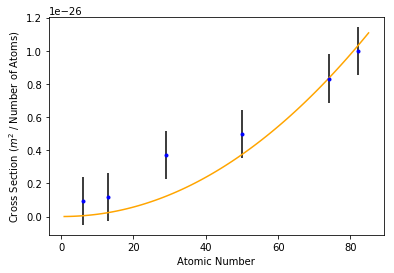

In [532]:
def sigpp(npa,n1,n2):
    return np.log(n1/n2)/npa

Z = np.array([6,13,29,50,74,82])
#[6,13,29,50,74,82]
I = [17.68421052631579,20.07894736842105,26.842105263157894,37.78947368421053,40.973684210526315,40.55263157894737]
#[17.68421052631579,20.07894736842105,26.842105263157894,37.78947368421053,40.973684210526315,40.55263157894737]
NpA = [2.240333176272161e+27,1.7266547612540997e+27,4.543579762290887e+26,2.7050726653630804e+26,1.5260534006699155e+26,1.2847715090722212e+26]
#[2.240333176272161e+23,1.7266547612540997e+23,4.543579762290887e+22,2.7050726653630804e+22,1.5260534006699155e+22,1.2847715090722212e+22]
sig = np.empty(len(Z))

print(len(Z),len(I),len(NpA),len(sig))

logsig = np.log(sig)
logZ = np.log(Z)

for i in range(len(Z)):
    sig[i] = -sigpp(NpA[i],I[i],int_na)
    
print(sig)

x = np.linspace(0,85,100)
y = np.empty(len(x))

#a = 1#10**-29.
#n = 2#1.887
#b = 1.8e-31#2E-31

C = 2.39e-31
n = 2.14

yerr = 1.4478959243098377e-27

for i in range(len(x)):
    #y[i] = a*x[i]**n+b
    y[i] = C*(x[i]**n)*( np.log(183/(x[i]**(1/3))) - 2/7 )

    
plt.plot(x,y,color = 'orange')
plt.plot(Z,sig,'.',color ='b')
#plt.plot(Z,logsig,'.', color = 'k')
plt.errorbar(Z,sig, ecolor = "k", yerr = yerr, linestyle = 'none' )
#plt.title('Pair Production')
plt.ylabel('Cross Section ($m^2$ / Number of Atoms)')
plt.xlabel('Atomic Number')
plt.show()

In [493]:
sig = [9.41999869e-28,1.14869163e-28,3.72634372e-28,4.99445049e-28,8.32300972e-28,9.96648085e-28]

err = np.sqrt(np.sum(np.square(sig)))

print(err)

1.7247877328231135e-27


[2.65786844e-29 1.02075152e+00]
[[ 7.53730756e-59 -7.75792999e-31]
 [-7.75792999e-31  8.60731131e-03]]


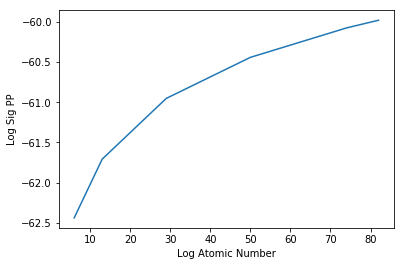

In [471]:
#X = np.array([Z,z])
sig = np.log([9.41999869e-28,1.14869163e-27,3.72634372e-27,4.99445049e-27,8.32300972e-27,9.96648085e-27])
Z = np.array([6,13,29,50,74,82])

def sigee(X,C,n):
    #plt.plot(Z, sig, '.')
    #plt.plot(X, sig)
    #plt.show()
    return n*np.log(Z) + np.log(C) + np.log(np.log(183/(Z**(1/3))))#C*(np.log(183/(X**(1/3)))-2/7)*(X**n)

params,params_cov = curve_fit(sigee, Z, sig, p0 = [1.8e-31,2])

print(params)
print(params_cov)

plt.plot(Z, sigee(Z, params[0], params[1]))
plt.ylabel("Log Sig PP")
plt.xlabel("Log Atomic Number")
plt.show()

#print(X[1,:])

[1.66186227e-29 1.16064200e+00]
[[ 6.86359024e-59 -9.71924760e-31]
 [-9.71924760e-31  1.38394844e-02]]


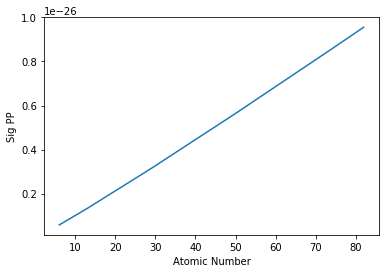

In [488]:
#X = np.array([Z,z])
sig = [9.41999869e-28,1.14869163e-27,3.72634372e-27,4.99445049e-27,8.32300972e-27,9.96648085e-27]
Z = np.array([6,13,29,50,74,82])

def sigee(X,C,n):
    #plt.plot(Z, sig, '.')
    #plt.plot(X, sig)
    #plt.show()
    return C*(np.log(183/(X**(1/3)))-2/7)*(X**n)

params,params_cov = curve_fit(sigee, Z, sig, p0 = [1.8e-31,2])

print(params)
print(params_cov)

plt.plot(Z, sigee(Z, params[0], params[1]))
plt.ylabel("Sig PP")
plt.xlabel("Atomic Number")
plt.show()

#print(X[1,:])

In [229]:
def sigee(X,C,n):
    Z,z = X
    return C*(np.log(183/(z**(1/3)))-2/7)*(Z**n)

params,params_cov = curve_fit(sigee, (Z,z), sig, p0 = [2,0.1])

print(params)
print(params_cov)

plt.plot((Z,z), sigee((Z,z), params[0], params[1]))


[-0.00438484  0.91897198]
[[7.25591290e-06 3.88081861e-04]
 [3.88081861e-04 2.08742988e-02]]


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'float'

C:\Users\Danial\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


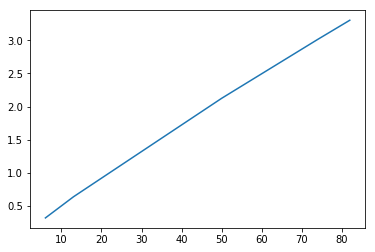

In [230]:


def sigee(Z,z,C,n):
    return C*(np.log(183/(z**(1/3)))-2/7)*(Z**n)

params, params_covariance = curve_fit(sigee, Z, sig,p0 =[2, 2,3])

plt.plot(Z, sigee(Z, params[0], params[1], params[2]),
         label='Fitted function')

In [460]:
Z = np.array([6,13,29,50,74,82])
I = [17.68421052631579,20.07894736842105,26.842105263157894,37.78947368421053,40.973684210526315,40.55263157894737]
NpA = [2.240333176272161e+23,1.7266547612540997e+23,4.543579762290887e+22,2.7050726653630804e+22,1.5260534006699155e+22,1.2847715090722212e+22]
sig = np.log([9.41999869e-28,1.14869163e-27,3.72634372e-27,4.99445049e-27,8.32300972e-27,9.96648085e-27])

#err = np.sqrt(np.sum(np.square(sig)))
#print(err)


def logsig(C,n,X,sig, plot = True):
    logpp = n*np.log(Z) + np.log(C) + np.log(np.log(183/(Z**(1/3))))
    chisq = np.sum((sig - logpp)**2)
    
    if plot:
        plt.plot(X,sig)
        plt.plot(X,logpp)
        plt.show()
    return chisq

C = 1.8e-31
n = 2

result = leastsq(logsig,C,n, args = (Z,sig))


TypeError: leastsq() got multiple values for argument 'args'